# Predicting SFE Values of Fe-Based High Entropy Superalloy
From the values, it can be known the optimum values for SFE (The lower the better) and also The SFE classification (Low, Medium, or High)

### Data Pre-Processing

In [433]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [434]:
# Load the data set from CSV
df = pd.read_csv('data/masterdata.csv')

# Take the important data only: T, at-Fe, at-Ni, at-Cr, at-Al, at-Cu, , SFE
df = df[['T(K)', 'atFe', 'atNi', 'atCr', 'atAl', 'atCu', 'SFE']]

# Change the 'T(K)' into T_K, so there'll be no error occured when using that column, because parenthese as column name is prone to causing error
df.rename(columns = {'T(K)':'T_K'}, inplace = True)
df.head()

,T_K,atFe,atNi,atCr,atAl,atCu,SFE
0,1,5.0,23.75,23.75,23.75,23.75,51.190587
1,1,6.0,23.50,23.50,23.50,23.50,50.890054
2,1,7.0,23.25,23.25,23.25,23.25,50.560903
3,1,8.0,23.00,23.00,23.00,23.00,50.203349
4,1,9.0,22.75,22.75,22.75,22.75,49.817608


In [435]:
# Separate the feature and targets into X and y
X = df.drop('SFE', axis=1)
y = df['SFE']

# Print the shape of Features (X) and targets (y)
print('X shape:', X.shape)
print('y shape:', y.shape)

# Convert X and y into NumPy arrays
X = X.to_numpy()
y = y.to_numpy()

X shape: (2340, 6)
y shape: (2340,)


In [436]:
# Split data
# Define function to split data into training and validation sets
def train_val_split(X, y, val_ratio, random_seed):

  # Implelmenting random seed
  np.random.seed(random_seed)
  indices = np.random.permutation(len(X))

  # Assign the validation size
  val_size = int(val_ratio * len(X))

  # Assign the indices for Training and Validation
  train_indices = indices[val_size:]
  val_indices = indices[:val_size]

  # Split into X and y
  X_train, y_train = X[train_indices], y[train_indices]
  X_val, y_val = X[val_indices], y[val_indices]

  return X_train, X_val, y_train, y_val

# Implement and assign the function above into variables
X_train, X_val, y_train, y_val = train_val_split(X, y, 0.2, 17)

In [437]:
# Normalize the data
X_train_normalized = (X_train - np.min(X_train, axis=0)) / (np.max(X_train, axis=0) - np.min(X_train, axis=0))
X_val_normalized = (X_val - np.min(X_val, axis=0)) / (np.max(X_val, axis=0) - np.min(X_val, axis=0))
y_train_normalized = (y_train - np.min(y_train, axis=0)) / (np.max(y_train, axis=0) - np.min(y_train, axis=0))
y_val_normalized = (y_val - np.min(y_val, axis=0)) / (np.max(y_val, axis=0) - np.min(y_val, axis=0))

### Model Architecture

In [438]:
# DNN Using Adam Optimizer

#Import libraries
import tensorflow as tf
from tensorflow.keras import layers

# Architecture
input_shape = (6, )

model = tf.keras.models.Sequential([
    layers.Dense(128, activation = 'relu', input_shape = input_shape),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(32, activation = 'relu'),
    layers.Dense(16, activation = 'relu'),
    layers.Dense(1, activation = 'linear')
])

# Compile the model 
optimizer = 'adam'

model.compile(
    optimizer = optimizer,
    loss = 'mean_squared_error',
    metrics =  [tf.keras.metrics.RootMeanSquaredError()]

)

model.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_142 (Dense)           (None, 128)               896       
                                                                 
 dense_143 (Dense)           (None, 64)                8256      
                                                                 
 dense_144 (Dense)           (None, 32)                2080      
                                                                 
 dense_145 (Dense)           (None, 16)                528       
                                                                 
 dense_146 (Dense)           (None, 1)                 17        
                                                                 
Total params: 11,777
Trainable params: 11,777
Non-trainable params: 0
_________________________________________________________________


In [439]:
# Train the model
history = model.fit(X_train_normalized, y_train_normalized, 
                    batch_size = 32, 
                    epochs = 10,
                    validation_data = (X_val_normalized, y_val_normalized)
                    )

Epoch 1/10
59/59 [==============================] - 4s 11ms/step - loss: 0.0179 - root_mean_squared_error: 0.1338 - val_loss: 7.3437e-04 - val_root_mean_squared_error: 0.0271
Epoch 2/10
59/59 [==============================] - 0s 5ms/step - loss: 2.1925e-04 - root_mean_squared_error: 0.0148 - val_loss: 1.7321e-04 - val_root_mean_squared_error: 0.0132
Epoch 3/10
59/59 [==============================] - 0s 5ms/step - loss: 6.7636e-05 - root_mean_squared_error: 0.0082 - val_loss: 8.7983e-05 - val_root_mean_squared_error: 0.0094
Epoch 4/10
59/59 [==============================] - 0s 5ms/step - loss: 4.5658e-05 - root_mean_squared_error: 0.0068 - val_loss: 8.6916e-05 - val_root_mean_squared_error: 0.0093
Epoch 5/10
59/59 [==============================] - 0s 5ms/step - loss: 3.3907e-05 - root_mean_squared_error: 0.0058 - val_loss: 6.8831e-05 - val_root_mean_squared_error: 0.0083
Epoch 6/10
59/59 [==============================] - 0s 5ms/step - loss: 2.7536e-05 - root_mean_squared_error: 0.0

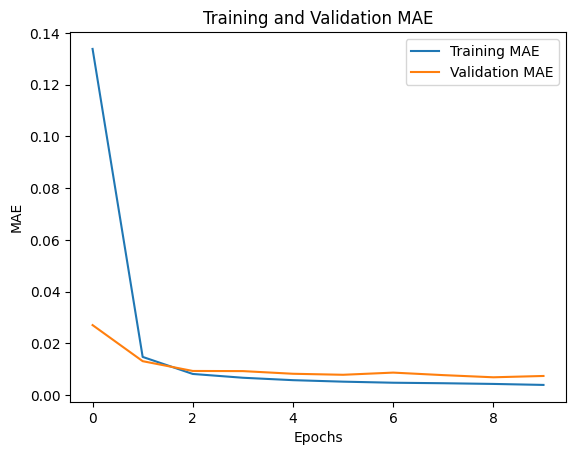

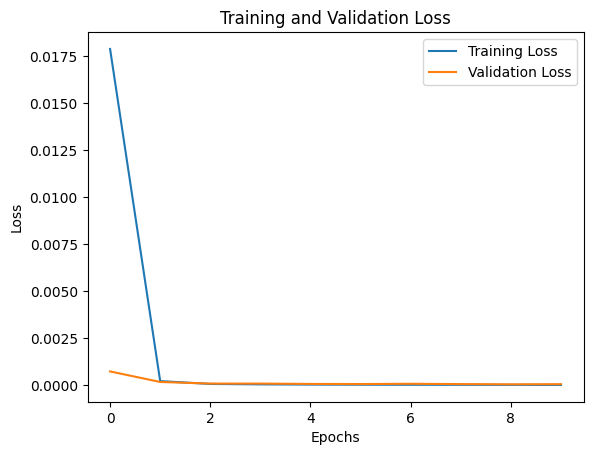

In [440]:
# Access the MAE and loss values from the history object
mae = history.history['root_mean_squared_error']
val_mae = history.history['val_root_mean_squared_error']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot MAE
plt.plot(mae, label='Training MAE')
plt.plot(val_mae, label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Training and Validation MAE')
plt.legend()
plt.show()

# Plot loss
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [441]:
def Generate_SFE( T, Fe, Ni, Cr, Al, Cu):

    # Make a new data called X_new
    X_new = np.array( [[ T, Fe, Ni, Cr, Al, Cu]] )

    # Normalize the new data using the same normalization parameter as the training data
    X_new_normalized = (X_new - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))

    # Perform predictions on the normalized test data
    y_pred_normalized = model.predict( X_new_normalized )

    # Denormalize the predicted values to obtain the actual predicted values
    y_pred = y_pred_normalized * (np.max(y, axis = 0) - np.min(y, axis = 0)) + np.min(y, axis=0)

    # Round the prediction
    rounded_predictions = np.round(y_pred, 2)

    # Separate and label the variables
    SFE_values = rounded_predictions[0, 0]
    
    # If else to know which classes 
    if SFE_values <=20 :
        cls = 'Low'
    elif SFE_values > 20 and SFE_values <= 80 :
        cls = 'Medium'
    else :
        cls = 'High'
    
    return SFE_values, cls

In [442]:
Generate_SFE(1, 9, 22.75, 22.75, 22.75, 22.75)

1/1 [==============================] - 0s 180ms/step


(51.19, 'Medium')

### Evaluation Metrics Visualization

In [443]:
import seaborn as sns
import matplotlib.pyplot as plt

In [444]:
# Make a new data called X_new
X_new = X_val

# Normalize the new data using the same normalization parameter as the training data
X_new_normalized = (X_new - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))

# Perform predictions on the normalized test data
y_pred_normalized = model.predict( X_new_normalized )

# Denormalize the predicted values to obtain the actual predicted values
y_pred = y_pred_normalized * (np.max(y, axis = 0) - np.min(y, axis = 0)) + np.min(y, axis=0)
y_pred = y_pred.flatten()

15/15 [==============================] - 0s 2ms/step


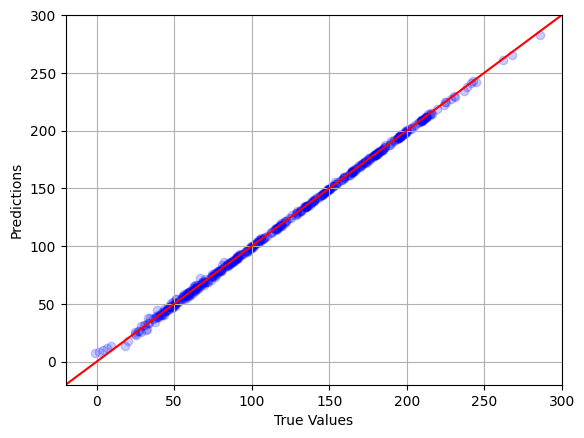

In [447]:
plt.scatter(y_val, y_pred, alpha=0.2, marker='o', color='b')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.grid()
lims = [-20,300]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims, color='r')

Text(0, 0.5, 'Count')

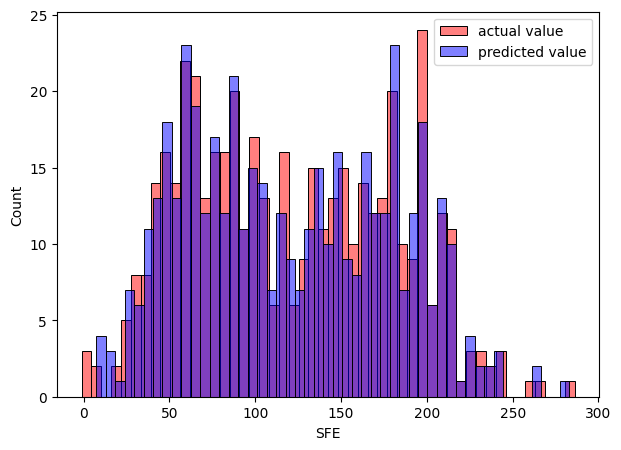

In [446]:
# Data Visualization of Prediction Result (Histogram)

plt.figure(figsize=(7,5))

sns.histplot(y_val, color='r', alpha=0.5, bins=50, label="actual value")
sns.histplot(y_pred, color='b', alpha=0.5,  bins=50, label='predicted value')


plt.legend()
plt.xlabel('SFE', fontsize=10)
plt.ylabel('Count', fontsize=10)